<a href="https://colab.research.google.com/github/ChiriKamau/limaAI/blob/main/notebooks/leaf_model/yololeafmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leaf model


In [ ]:
!pip install ultralytics opencv-python -q
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
from PIL import Image as PILImage
from sklearn.model_selection import train_test_split



In [ ]:
#CSV paths and their corresponding image directories (modify these as needed)
csv_image_mapping = [
    {
        'csv_path': '/content/drive/MyDrive/Tomato_dataset/Phone1_Leaves(batch3)/annotations/phone 1_leaves(batch3).csv',
        'image_dir': '/content/drive/MyDrive/Tomato_dataset/Phone1_Leaves(batch3)'
    },
    {'csv_path': '/content/drive/MyDrive/Tomato_dataset/Phone2_leaves/annotations/Phone2_leaves.csv',
        'image_dir': '/content/drive/MyDrive/Tomato_dataset/Phone2_leaves'
    },
     {'csv_path': '/content/drive/MyDrive/Tomato_dataset/phone1_leaves(batch1)/annotations/phone1_leaves(batch1).csv',
        'image_dir': '/content/drive/MyDrive/Tomato_dataset/phone1_leaves(batch1)'
    },
     {'csv_path': '/content/drive/MyDrive/Tomato_dataset/phone1_leaves(batch2)/annotations/phone1_leaves(batch2).csv',
        'image_dir': '/content/drive/MyDrive/Tomato_dataset/phone1_leaves(batch2)'
    }
    ]

In [ ]:
# Get annotated image names from CSVs
annotated_images = set()
for mapping in csv_image_mapping:
    try:
        df = pd.read_csv(mapping['csv_path'])
        annotated_images.update(df['image_name'].unique())
    except Exception as e:
        print(f"Error reading {mapping['csv_path']}: {e}")

# Get all images from directories
all_images = set()
for mapping in csv_image_mapping:
    try:
        images = [f for f in os.listdir(mapping['image_dir']) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        all_images.update(images)
    except Exception as e:
        print(f"Error accessing {mapping['image_dir']}: {e}")

# Calculate annotated and unannotated counts
unannotated_images = all_images - annotated_images
print(f"Annotated images: {len(annotated_images)}")
print(f"Unannotated images: {len(unannotated_images)}")
if unannotated_images:
    print("Unannotated images:", unannotated_images)

Annotated images: 515
Unannotated images: 96
Unannotated images: {'IMG_20250906_130027.jpg', 'IMG_20250906_125958.jpg', 'IMG_20250906_124503.jpg', 'IMG_20250906_130024.jpg', 'IMG_20250906_130627.jpg', 'IMG_20250906_125521.jpg', 'IMG_20250906_130304.jpg', 'IMG_20250906_124644.jpg', 'IMG_20250906_130034.jpg', 'IMG_20250906_124435.jpg', 'IMG_20250906_125935.jpg', 'IMG_20250906_132738.jpg', 'IMG_20250906_125434.jpg', 'IMG_20250906_130034_1.jpg', 'IMG_20250906_114018_HDR.jpg', 'IMG_20250906_125528.jpg', 'IMG_20250906_125943.jpg', 'Screenshot_20250905-212327.png', 'IMG_20250906_131710.jpg', 'IMG_20250906_130508.jpg', 'IMG_20250906_142801.jpg', 'IMG_20250906_125544.jpg', 'IMG_20250906_125136.jpg', 'IMG_20250905_153409_3.jpg', 'IMG_20250906_125223.jpg', 'IMG_20250906_130823.jpg', 'IMG_20250906_132222_HDR.jpg', 'IMG_20250906_132820.jpg', 'IMG_20250906_143119_HDR.jpg', 'IMG_20250906_130331.jpg', 'IMG_20250906_132424.jpg', 'IMG_20250906_125133.jpg', 'IMG_20250906_125403.jpg', 'IMG_20250906_130824

In [ ]:
# Check annotated vs unannotated per folder
for mapping in csv_image_mapping:
    csv_path = mapping['csv_path']
    image_dir = mapping['image_dir']
    folder_name = os.path.basename(image_dir)

    try:
        # Load annotated image names
        df = pd.read_csv(csv_path)
        annotated = set(df['image_name'].unique())
    except Exception as e:
        print(f"Error reading CSV for {folder_name}: {e}")
        annotated = set()

    try:
        # Get all images
        all_imgs = {f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))}
    except Exception as e:
        print(f"Error accessing images in {folder_name}: {e}")
        all_imgs = set()

    # Compare
    unannotated = all_imgs - annotated

    print(f"\n Folder: {folder_name}")
    print(f"  Total images:       {len(all_imgs)}")
    print(f"  Annotated images:   {len(annotated)}")
    print(f"  Unannotated images: {len(unannotated)}")

    if unannotated:
        print("   Unannotated samples:", list(unannotated)[:5], "..." if len(unannotated) > 5 else "")


 Folder: Phone1_Leaves(batch3)
  Total images:       113
  Annotated images:   96
  Unannotated images: 17
   Unannotated samples: ['IMG_20250906_125136.jpg', 'IMG_20250906_125258_1.jpg', 'IMG_20250906_124951.jpg', 'IMG_20250906_124435.jpg', 'IMG_20250906_124418.jpg'] ...

 Folder: Phone2_leaves
  Total images:       218
  Annotated images:   191
  Unannotated images: 27
   Unannotated samples: ['IMG_20250906_143920_3.jpg', 'IMG_20250905_153409_3.jpg', 'IMG_20250906_134419.jpg', 'IMG_20250906_124436_HDR.jpg', 'IMG_20250906_132427.jpg'] ...

 Folder: phone1_leaves(batch1)
  Total images:       150
  Annotated images:   139
  Unannotated images: 11
   Unannotated samples: ['IMG_20250906_143945.jpg', 'IMG_20250906_132126.jpg', 'IMG_20250906_132820.jpg', 'IMG_20250906_131713.jpg', 'IMG_20250906_132738.jpg'] ...

 Folder: phone1_leaves(batch2)
  Total images:       150
  Annotated images:   106
  Unannotated images: 44
   Unannotated samples: ['IMG_20250906_125544.jpg', 'IMG_20250906_13004

In [ ]:
dfs = []
for mapping in csv_image_mapping:
    try:
        df = pd.read_csv(mapping['csv_path'])
        df['image_dir'] = mapping['image_dir']  # Add image_dir column
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {mapping['csv_path']}: {e}")
        raise

# Concatenate DataFrames in memory for processing
data = pd.concat(dfs, ignore_index=True)

# Ensure correct columns
expected_columns = ['image_name', 'label_name', 'bbox_x', 'bbox_y',
                    'bbox_width', 'bbox_height', 'image_width',
                    'image_height', 'image_dir']
data = data[expected_columns]

# Check for missing or invalid labels
print("Missing label_name values:", data['label_name'].isna().sum())
print("Unique label_name values:", data['label_name'].unique())

data = data.dropna(subset=['label_name'])
data = data[data['label_name'].apply(lambda x: isinstance(x, str))]

# ------------------------------
# MULTICLASS FIX (exact labels)
# ------------------------------
# Use exact label_name as the class
data['class_name'] = data['label_name'].astype(str).str.strip()

print("Unique multiclass labels:", data['class_name'].unique())

# Class distribution
print("Class distribution (multiclass):")
print(data['class_name'].value_counts())

# Validate bounding boxes
invalid_bboxes = data[
    (data['bbox_width'] <= 0) |
    (data['bbox_height'] <= 0) |
    (data['bbox_x'] < 0) |
    (data['bbox_y'] < 0) |
    (data['bbox_x'] + data['bbox_width'] > data['image_width']) |
    (data['bbox_y'] + data['bbox_height'] > data['image_height'])
]
if not invalid_bboxes.empty:
    print("Invalid bounding boxes:", invalid_bboxes[['image_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']])
    data = data[~data.index.isin(invalid_bboxes.index)]

# Train/val split
unique_filenames = data['image_name'].unique()
train_filenames, val_filenames = train_test_split(unique_filenames, test_size=0.2, random_state=42)

# Create dataset directories
dataset_dir = '/content/dataset'
images_train_dir = os.path.join(dataset_dir, 'images', 'train')
images_val_dir = os.path.join(dataset_dir, 'images', 'val')
labels_train_dir = os.path.join(dataset_dir, 'labels', 'train')
labels_val_dir = os.path.join(dataset_dir, 'labels', 'val')

os.makedirs(images_train_dir, exist_ok=True)
os.makedirs(images_val_dir, exist_ok=True)
os.makedirs(labels_train_dir, exist_ok=True)
os.makedirs(labels_val_dir, exist_ok=True)

# ---------------------------------
# MULTICLASS CLASS MAP (EXACT)
# ---------------------------------
unique_classes = sorted(data['class_name'].unique())
class_map = {cls: i for i, cls in enumerate(unique_classes)}

print("CLASS MAP (exact names):")
print(class_map)


Missing label_name values: 0
Unique label_name values: ['Flowers' 'Leaf_spot' 'Y.leaf_curl' 'Wilt' 'Early_blight' 'Late_blight' 'Pests' 'Powdery_mildew']
Unique multiclass labels: ['Flowers' 'Leaf_spot' 'Y.leaf_curl' 'Wilt' 'Early_blight' 'Late_blight' 'Pests' 'Powdery_mildew']
Class distribution (multiclass):
class_name
Flowers           765
Y.leaf_curl       447
Late_blight       166
Powdery_mildew    121
Early_blight      116
Wilt              114
Leaf_spot          79
Pests              36
Name: count, dtype: int64
CLASS MAP (exact names):
{'Early_blight': 0, 'Flowers': 1, 'Late_blight': 2, 'Leaf_spot': 3, 'Pests': 4, 'Powdery_mildew': 5, 'Wilt': 6, 'Y.leaf_curl': 7}


In [ ]:
# Create YOLO label file (MULTICLASS VERSION)
def create_yolo_label(filename, split_dir, is_train=True):
    annotations = data[data['image_name'] == filename]
    if annotations.empty:
        print(f"No annotations for {filename}")
        return False

    image_dir = annotations['image_dir'].iloc[0]
    image_path = os.path.join(image_dir, filename)
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return False

    width = annotations['image_width'].iloc[0]
    height = annotations['image_height'].iloc[0]

    # Choose train or val folder
    dest_image_dir = images_train_dir if is_train else images_val_dir
    dest_image_path = os.path.join(dest_image_dir, filename)
    shutil.copy(image_path, dest_image_path)

    # YOLO label file path
    label_path = os.path.join(
        labels_train_dir if is_train else labels_val_dir,
        filename.replace('.jpg', '.txt')
    )

    valid_annotations = 0

    with open(label_path, 'w') as f:
        for _, ann in annotations.iterrows():

            # ---------------------------------------------------
            # MULTICLASS: use exact label_name → class_name → class_id
            # ---------------------------------------------------
            cls = class_map[ann['class_name']]

            # Normalize bbox
            x_center = (ann['bbox_x'] + ann['bbox_width'] / 2) / width
            y_center = (ann['bbox_y'] + ann['bbox_height'] / 2) / height
            w = ann['bbox_width'] / width
            h = ann['bbox_height'] / height

            # Valid YOLO format?
            if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 < w <= 1 and 0 < h <= 1:
                f.write(f"{cls} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")
                valid_annotations += 1
            else:
                print(f"Skipping invalid bbox for {filename}: {x_center}, {y_center}, {w}, {h}")

    print(f"Created label file: {label_path} with {valid_annotations} annotations")
    return valid_annotations > 0


In [ ]:
# Create YOLO labels for train and val
train_success = []
val_success = []

# Train set
for filename in train_filenames:
    train_success.append(create_yolo_label(filename, 'train', is_train=True))

# Val set
for filename in val_filenames:
    val_success.append(create_yolo_label(filename, 'val', is_train=False))

# Verify dataset
print(f"Train images: {len(os.listdir(images_train_dir))} in {images_train_dir}")
print(f"Val images: {len(os.listdir(images_val_dir))} in {images_val_dir}")
print(f"Train labels: {len(os.listdir(labels_train_dir))} in {labels_train_dir}")
print(f"Val labels: {len(os.listdir(labels_val_dir))} in {labels_val_dir}")
print(f"Dataset prepared with {sum(train_success)} train images and {sum(val_success)} val images with valid annotations.")


Created label file: /content/dataset/labels/train/IMG_20250906_132906.txt with 2 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_133734.txt with 4 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_130903.txt with 2 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_143850.txt with 4 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_130318.txt with 2 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_132707.txt with 4 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_143834_HDR.txt with 9 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_134410.txt with 5 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_124738.txt with 5 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_143539.txt with 5 annotations
Created label file: /content/dataset/labels/train/IMG_20250906_133

In [ ]:
# Check a sample label file
sample_label = os.path.join(labels_train_dir, 'IMG_20250906_130900.txt')
if os.path.exists(sample_label):
    with open(sample_label, 'r') as f:
        print(f"Sample label file {sample_label}:\n{f.read()}")

In [ ]:
import os
import yaml  # optional, but recommended for proper YAML formatting

# Path to dataset
yaml_path = '/content/data.yaml'

# Prepare YAML content
yaml_content = {
    'train': os.path.join(dataset_dir, 'images', 'train'),
    'val': os.path.join(dataset_dir, 'images', 'val'),
    'nc': len(class_map),
    'names': [cls for cls, idx in sorted(class_map.items(), key=lambda x: x[1])]
}

# Write YAML file
with open(yaml_path, 'w') as f:
    yaml.dump(yaml_content, f, default_flow_style=False)

# Verify
if os.path.exists(yaml_path):
    print(f"data.yaml created at {yaml_path}")
    with open(yaml_path, 'r') as f:
        print("data.yaml content:\n", f.read())
else:
    print(f"Failed to create data.yaml at {yaml_path}")


data.yaml created at /content/data.yaml
data.yaml content:
 names:
- Early_blight
- Flowers
- Late_blight
- Leaf_spot
- Pests
- Powdery_mildew
- Wilt
- Y.leaf_curl
nc: 8
train: /content/dataset/images/train
val: /content/dataset/images/val



In [ ]:
from ultralytics import YOLO
import os

# Verify data.yaml exists
yaml_path = '/content/data.yaml'
if not os.path.exists(yaml_path):
    raise FileNotFoundError(f"Error: {yaml_path} does not exist")

# Load pretrained YOLOv8 medium model
model = YOLO('yolov8m.yaml')  # not .pt


# -------------------------------
# Optional: Compute class weights for multiclass
# -------------------------------
class_counts = data['class_name'].value_counts()
total = class_counts.sum()
# Compute weight = total / (num_classes * class_count)
num_classes = len(class_counts)
class_weights_list = [total / (num_classes * class_counts.get(cls, 1)) for cls in class_counts.index]

print("Multiclass class counts:\n", class_counts)
print("Computed class weights:", class_weights_list)

# -------------------------------
# Train YOLOv8
# -------------------------------
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=320,
    batch=16,
    augment=True,
    hsv_h=0.4,
    hsv_s=0.9,
    hsv_v=0.7,
    fliplr=0.5,
    flipud=0.5,
    scale=0.8,
    translate=0.4,
    mosaic=1.0,
    mixup=0.4,
    patience=30,
    lr0=0.0003,
    iou=0.5,
    max_det=90,
    # class_weights=class_weights_list  # Optional: YOLOv8 supports list of class weights
)

print("Training completed.")

# Save path
save_path = '/content/drive/MyDrive/Tomato_dataset/models/yolov8m_trained(v3).pt'
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the trained model
try:
    model.save(save_path)
    print(f"Model saved to {save_path}")
except Exception as e:
    print(f"Error saving model: {e}")
    raise


Multiclass class counts:
 class_name
Flowers           765
Y.leaf_curl       447
Late_blight       166
Powdery_mildew    121
Early_blight      116
Wilt              114
Leaf_spot          79
Pests              36
Name: count, dtype: int64
Computed class weights: [np.float64(0.30130718954248364), np.float64(0.5156599552572707), np.float64(1.3885542168674698), np.float64(1.9049586776859504), np.float64(1.9870689655172413), np.float64(2.0219298245614037), np.float64(2.9177215189873418), np.float64(6.402777777777778)]
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=Non

In [ ]:
from IPython.display import Image as IPImage, display
import cv2
import os

# Define test image paths (modify as needed)
test_images = ['/content/drive/MyDrive/Tomato_dataset/phone1_leaves(batch1)/IMG_20250906_142159.jpg']

# Inference function
def test_and_draw_boxes(image_path, output_path, model, conf=0.2, iou=0.4):
    if not os.path.exists(image_path):
        print(f"Error: Image {image_path} not found")
        return
    results = model(image_path, conf=conf, iou=iou, max_det=100)
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = model.names[int(box.cls[0])]
            conf = float(box.conf[0])
            color = (0, 255, 0) if label.startswith('G') else (255, 0, 0)
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, f"{label} {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    print(f"Output saved to {output_path}")
    display(IPImage(output_path))

In [ ]:
# Model path
model_path = '/content/drive/MyDrive/Tomato_dataset/models/yolov8m_trained(v3).pt'

# Load model
model = YOLO(model_path)

# Run inference (assumes test_and_draw_boxes and test_images are defined)
for i, img_path in enumerate(test_images):
    test_and_draw_boxes(img_path, f'/content/output_drive_{i}.jpg', model)

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 92 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2708.5±186.0 MB/s, size: 5005.6 KB)
val: Scanning /content/dataset/labels/val.cache... 103 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 103/103 162.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 8.4s/it 58.9s
                   all        103        360      0.817     0.0573     0.0479     0.0167
          Early_blight         13         17          1          0    0.00216    0.00116
               Flowers         64        143      0.279      0.406      0.249     0.0752
           Late_blight         24         42          1          0      0.011    0.00408
             Leaf_spot          7          9          1          0    0.00283    0.00226
                 Pests          2          2

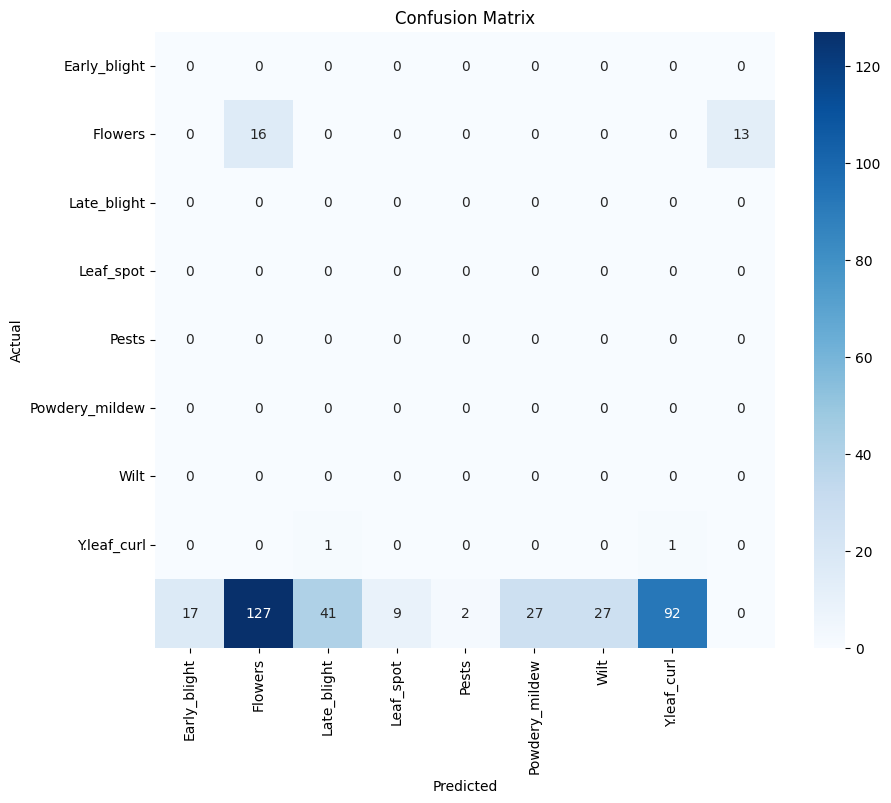

In [29]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load trained model
model_path = '/content/drive/MyDrive/Tomato_dataset/models/yolov8m_trained(v3).pt'
model = YOLO(model_path)

# Evaluate on validation set and generate plots
results = model.val(data='/content/data.yaml', imgsz=320, batch=16, plots=True)

# ------------------------
# Confusion matrix (per class)
# ------------------------
# results.plot_confusion_matrix() is automatic if plots=True
# But you can also create a heatmap manually:

if hasattr(results, 'confusion_matrix') and results.confusion_matrix is not None:
    # Access the actual numpy array from the ConfusionMatrix object
    cm = results.confusion_matrix.matrix
    class_names = [name for idx, name in sorted(results.names.items())]

    # Ensure cm is not empty or scalar before plotting
    if cm.ndim == 2 and cm.size > 0:
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
    else:
        print("Confusion matrix is not a valid 2D array or is empty, skipping plot.")

# ------------------------
# Precision-Recall curve
# ------------------------
if hasattr(results, 'pr_curves') and results.pr_curves is not None:
    # Ensure pr_curves is not empty
    if len(results.pr_curves) > 0:
        plt.figure(figsize=(10, 8))
        for cls_idx, cls_name in results.names.items():
            pr_data = results.pr_curves[cls_idx]  # (precision, recall) for this class
            # Ensure pr_data contains actual precision and recall arrays
            if pr_data is not None and len(pr_data) == 2 and pr_data[0].size > 0 and pr_data[1].size > 0:
                precision, recall = pr_data
                plt.plot(recall, precision, label=cls_name)
            else:
                print(f"PR data for class {cls_name} is invalid or empty, skipping plot.")

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve (Per Class)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No PR curves found, skipping plot.")

In [30]:
print(model.names)



{0: 'Early_blight', 1: 'Flowers', 2: 'Late_blight', 3: 'Leaf_spot', 4: 'Pests', 5: 'Powdery_mildew', 6: 'Wilt', 7: 'Y.leaf_curl'}


In [33]:
!grep -R "" /content/dataset/labels/val | wc -l

360
